# Kernel - Support Vector Machine

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset

In [14]:
dataset = pd.read_csv(r'C:\Users\Ikshita\Downloads\Kernel_SVM\Social_Network_Ads.csv')
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

# Splitting Dataset

In [15]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=0)

# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

# Building and Fitting Model to Training Data

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0,degree=2)
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

# Prediction

In [19]:
y_pred = classifier.predict(x_test)

# Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[55,  3],
       [ 1, 21]], dtype=int64)

# Visualization


## Training Set

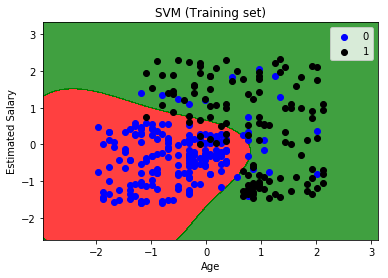

In [21]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'black'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Test Set

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set= x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'black'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()